<a href="https://colab.research.google.com/github/ahmadghulamrn/autoencoder-fashion-mnist/blob/main/aoutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist


In [2]:
# Memuat dataset Fashion MNIST
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalisasi citra
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Menambahkan dimensi channel untuk citra grayscale
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

# Membuat model autoencoder
autoencoder = models.Model(input_img, decoded)

# Membuat model encoder untuk ekstraksi fitur
encoder = models.Model(input_img, encoded)


In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Melatih model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 352ms/step - loss: 0.3797 - val_loss: 0.2852
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 342ms/step - loss: 0.2813 - val_loss: 0.2774
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 339ms/step - loss: 0.2741 - val_loss: 0.2727
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 340ms/step - loss: 0.2697 - val_loss: 0.2693
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 335ms/step - loss: 0.2660 - val_loss: 0.2660
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 336ms/step - loss: 0.2638 - val_loss: 0.2635
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 333ms/step - loss: 0.2617 - val_loss: 0.2627
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 331ms/step - loss: 0.2595 - val_loss: 0.2607
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 338ms/step - loss: 0.2588 - val_loss: 0.2599
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 331ms/step - loss: 0.2572 - val_loss: 0.2595
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 331ms/step - loss: 0.2572 - val_loss: 0.2585
Epoch 12/50
235/23

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


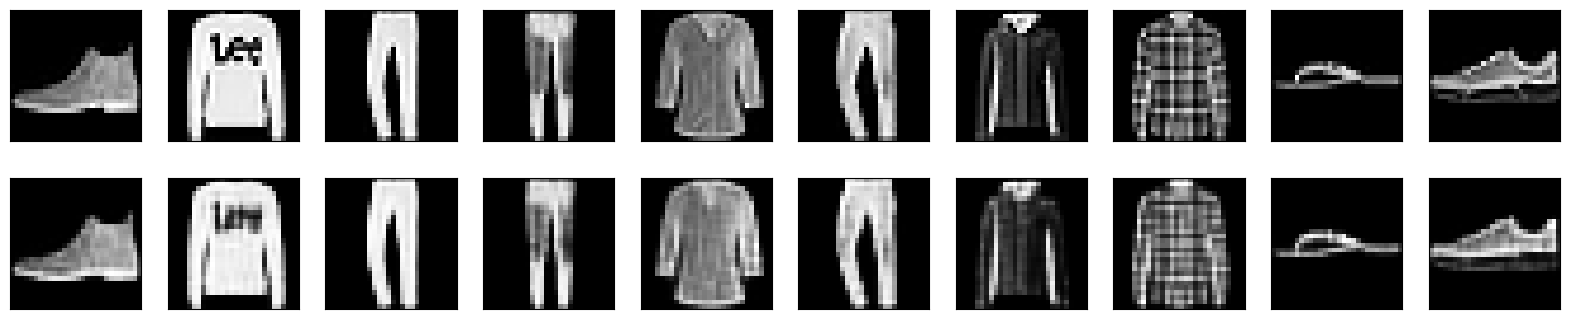

In [5]:
# Menampilkan beberapa hasil input dan output
n = 10  # Menampilkan 10 gambar
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    decoded_imgs = autoencoder.predict(x_test)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [6]:
autoencoder.save("autoencoder_model.h5")
